<a href="https://colab.research.google.com/github/YuToyoshima/python_samples/blob/main/turing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# チューリング・パターンのシミュレーション

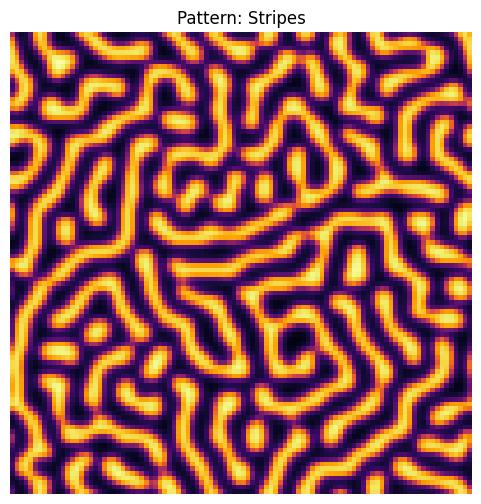

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# ========== パラメータ設定 ==========
width, height = 100, 100
maxConc = 10
maxTime = 2000
numStep = 3
pattern_type = "Stripes"  # "Original", "Stripes", "Chaotic", "Girraff", "BZ (spiral) wave", "Division", "Spot"

# ========== パラメータ選択 ==========
if pattern_type == "Original":
    paramU = [0.08, -0.08, 0.03, 0.20, 0.03, 0.02]
    paramV = [0.00,  0.10, -0.15, 0.50, 0.08, 0.50]
elif pattern_type == "Stripes":
    paramU = [0.08, -0.08, 0.10, 0.20, 0.03, 0.02]
    paramV = [0.00,  0.11, -0.15, 0.50, 0.06, 0.50]
elif pattern_type == "Chaotic":
    paramU = [0.09, -0.08, 0.00, 0.20, 0.03, 0.01]
    paramV = [0.00,  0.06, -0.15, 0.50, 0.03, 0.01]
elif pattern_type == "Girraff":
    paramU = [0.08, -0.08, 0.00, 0.20, 0.03, 0.02]
    paramV = [0.00,  0.06, -0.15, 0.10, 0.03, 0.25]
elif pattern_type == "BZ (spiral) wave":
    paramU = [2.00, -6.00, 0.00, 1.00, 0.10, 0.02]
    paramV = [0.00,  0.20, 0.00, 5.00, 0.60, 0.00]
elif pattern_type == "Division":
    paramU = [0.07, -0.08, 0.00, 0.25, 0.03, 0.025]
    paramV = [0.00,  0.04, -0.14, 0.15, 0.013, 0.25]
elif pattern_type == "Spot":
    paramU = [0.08, -0.08, 0.01, 0.20, 0.03, 0.02]
    paramV = [0.00,  0.11, -0.15, 0.50, 0.06, 0.50]
else:
    raise ValueError("Unknown pattern type")

# 時間分割
paramU = np.array(paramU) / numStep
paramV = np.array(paramV) / numStep

# 初期化
U = np.random.rand(width, height) * maxConc
V = np.random.rand(width, height) * maxConc

# データ格納用
UAll = np.zeros((maxTime, width, height))
UAll[0] = U

# ラプラシアンカーネル
matDiffusion = np.array([[0, 1, 0],
                         [1, -4, 1],
                         [0, 1, 0]])

# ========== シミュレーション ==========
for t in range(1, maxTime):
    for _ in range(numStep):
        dUdt = np.clip(paramU[0]*U + paramU[1]*V + paramU[2], 0, paramU[3]) - paramU[4]*U
        dVdt = np.clip(paramV[0]*V + paramV[1]*U + paramV[2], 0, paramV[3]) - paramV[4]*V
        dUdx = paramU[5] * convolve2d(U, matDiffusion, mode='same', boundary='wrap')
        dVdx = paramV[5] * convolve2d(V, matDiffusion, mode='same', boundary='wrap')

        U = np.clip(U + (dUdt + dUdx) / numStep, 0, maxConc)
        V = np.clip(V + (dVdt + dVdx) / numStep, 0, maxConc)

    UAll[t] = U

# 正規化（MATLABの UAll./max(UAll,[],[1,2]) 相当）
UAll = UAll / np.max(UAll, axis=(1,2), keepdims=True)

# ========== アニメーション ==========
fig, ax = plt.subplots(figsize=(6,6))
img = ax.imshow(UAll[0], cmap='inferno', interpolation='nearest', vmin=0, vmax=1)
ax.axis('off')
ax.set_title(f"Pattern: {pattern_type}")

def update(frame):
    img.set_data(UAll[frame])
    return [img]

ani = FuncAnimation(fig, update, frames=range(0, maxTime, 10), interval=50, blit=True)
HTML(ani.to_html5_video())
